
# Minitarea 3


-----------------

Nombre: Javier Urrutia

Fecha de Entrega: Domingo 17 de Mayo


## Instrucciones

- El ejercicio consiste en:

    - Responder preguntas relativas a los contenidos vistos en los vídeos y slides de las clases. 
    
    - Entrenar Word2Vec y FastText sobre un pequeño corpus.
    
    - Evaluar los embeddings obtenidos en una tarea de clasificación.

- La minitarea es INDIVIDUAL.

- Está demás decir que no se admiten copias, ni de código, ni de respuestas escritas. 

- La entrega debe ser por u-cursos.

- Atrasos: se descontará un punto por día hábil de atraso tanto para las mini-tareas como para las competencias.

- En el horario de auxiliar se abrirán horarios de consulta en donde podrán preguntar acerca del ejercicio y en general, de todo el curso. 

- Cada sección tiene un punto base y se evalúa sobre 6 puntos.

- Al revisar, tu código será ejecutado. Verifica que tu entrega no tenga errores.


## Referencias   

Vídeos: 

- [Linear Models](https://youtu.be/zhBxDsNLZEA)
- [Neural Networks](https://youtu.be/oHZHA8h2xN0)
- [Word Embeddings](https://youtu.be/wtwUsJMC9CA)

## Preguntas Teóricas
Para estas preguntas no es necesario implementar código, pero pueden utilizar pseudo código.

### Parte 1: Modelos Lineales

Suponga que tiene un dataset de 10.000 documentos etiquetados por 4 categorías: política, deporte, negocios y otros. 

**Pregunta 1**: Diseñe un modelo lineal capaz de clasificar un documento según estas categorías donde el output sea un vector con una distribución de probabilidad con la pertenencia a cada clase. (3 puntos)

**Respuesta**: 

Representación escogida del documento de entrada: La representación puede ser a partir de un modelo de words embedding, quedando los documentos representados por un vector no sparse de largo N.

Parámetros del modelo: Para un modelo lineal $f(\vec{x}) = \vec{x} \cdot \vec{W} + \vec{b}$ los parámetros serían una matriz $W$ de dimensiones (Nx4) y un vector bias $\vec{b}$ de largo 4, tal que la salida sea de dimensión 4.

Transformaciones necesarias: Para obtener el resultado como probabilidades de pertenecia a cada clase, a la salida se aplica una tranformación softmax quedando $\vec{\hat{y}} = softmax(f(\vec{x}))$

Función de pérdida escogida: Para el caso multiclase con softmax se usa entropía cruzada

**Pregunta 2**: Explique el proceso de entrenamiento y evaluación del modelo. (3 puntos)

**Respuesta**: Primero se separan los datos en 3 sets, entrenamiento, validación y test. Para el entrenamiento se utiliza gradiente descendiente. En este se inicia con pesos aleatorios del modelo, luego en forma iterativa se calcula la función de pérdida con los ejemplos, se calculan gradientes y se actualizan los pesos en la dirección contraria a los gradientes. Esto se repite por una cantidad fija de iteraciones o hasta que se cumpla algun criterio. Además se puede agregar un parámetro de regularización a la función de perdida de ser necesario para que el modelo se más robusto a outliers. El modelo entrenado se puedde evaluar con el set de evaluación para ajustar hiperparámetros como la regularización o el optimizador y finalmente se evalá en el set de test.

### Parte 2: Redes Neuronales

Supongamos que tenemos la siguiente red neuronal.

![Red](https://drive.google.com/uc?id=1Yd0s9g5SlB1-XuVokGQO2J-yDudQe2Kr)

**Pregunta 1**: En clases les explicaron como se puede representar una red neuronal de una y dos capas de manera matemática. Dada la red neuronal anterior, represéntela matemáticamente, entregando las dimensiones de las matrices y vectores. (3 Puntos)

**Respuesta**: 
Suponiendo que hay bias en cada capa

Formula:
$\vec{\hat{y}} = NN_{MLP3}(\vec{x}) = h(f(g(\vec{x} \cdot W^1 + \vec{b^1}) \cdot W^2 + \vec{b^2}) \cdot W^3 + \vec{b^3}) \cdot W^4$ + \vec{b^4}

$\vec{x}$ es de dimensión 3, $W^1$ es de dimension (3x2), $W^2$ es de dimension (2x3), $W^3$ es de dimension (3x1), $W^4$ es de dimension (1x4), $\vec{b^1}$ es de dimensión 2, $\vec{b^2}$ es de dimensión 3, $\vec{b^3}$ es de dimensión 1, $\vec{b^4}$ es de dimensión 4 e $\vec{\hat{y}}$ es de dimension 4.

**Pregunta 2**: Qué es backpropagation? Cuales serían los parámetros a evaluar en la red neuronal anterior? (1 punto)

**Respuesta**: Backpropagation se refiere a propagar los gradientes de la red del final hacia el principio, siguiendo la regla de la cadena y así obtener los gradientes que se deben usar para el gradiente descendiente. Los parámetros de la red son los pesos $W^i$ en cada capa.

**Pregunta 3**: Explique los pasos de backpropagation. En la red neuronal anterior: Cuales son las derivadas que debemos calcular para poder obtener $\vec{\delta^l_{[j]}}$ en todas las capas? (2 puntos)

**Respuesta**: Para realizar backpropagation primero se pasa una entrada por la red para obtener todos los valores de activación en cada capa. Luego se calculan las dereviadas de la últma capa $\vec{\delta^m_{[j]}} = \frac{\partial L}{\partial \vec{h^m_{[j]}}}$. Despues se propaga hacia atŕas para obtener las derivadas $\vec{\delta^l_{[j]}} = {g}'(\vec{h^l_{[j]}})\times \sum_{k}(\vec{h^{l+1}_{[j]}} \times W^{l+1}_{[j,k]})$. finalmente se usa la ecuación $\frac{\partial L}{\partial W^{l}_{[i,j]}} = \vec{\delta^l_{[j]}} \times \vec{z^{l-1}_{[i]}}$ para obtener las derivadas de los pesos

## Pregunta Práctica:

### Parte 3: Word Embeddings

En la auxiliar 2 aprendieron como entrenar Word2Vec utilizando gensim. El objetivo de esta parte es comparar los embeddings obtenidos con dos modelos diferentes: Word2Vec y [FastText](https://radimrehurek.com/gensim/models/fasttext.html) (utilizen size=200 en FastText) entrenados en el mismo dataset de diálogos de los Simpson. 

In [1]:
import re  
import pandas as pd 
from time import time  
from collections import defaultdict 
import string 
import multiprocessing
import os
import gensim
import sklearn
from sklearn import linear_model
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, cohen_kappa_score, classification_report

# word2vec
from gensim.models import Word2Vec, KeyedVectors, FastText
from gensim.models.phrases import Phrases, Phraser
from sklearn.model_selection import train_test_split
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger(__name__)

Utilizando el dataset adjunto con la tarea:

In [2]:
data_file = "dialogue-lines-of-the-simpsons.zip"
df = pd.read_csv(data_file)
stopwords = pd.read_csv(
    'https://raw.githubusercontent.com/Alir3z4/stop-words/master/english.txt'
).values
stopwords = Counter(stopwords.flatten().tolist())
df = df.dropna().reset_index(drop=True) # Quitar filas vacias

**Pregunta 1**: Ayudándose de los pasos vistos en la auxiliar, entrene los modelos Word2Vec y FastText sobre el dataset anterior. (4 puntos) (Hint, le puede servir explorar un poco los datos)

**Respuesta**:

In [6]:
df

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
...,...,...
131848,Miss Hoover,I'm back.
131849,Miss Hoover,"You see, class, my Lyme disease turned out to ..."
131850,Miss Hoover,Psy-cho-so-ma-tic.
131851,Ralph Wiggum,Does that mean you were crazy?


In [14]:
stopwords

Counter({"'tis": 1,
         "'twas": 1,
         "'ve": 1,
         '10': 1,
         '39': 1,
         'a': 1,
         "a's": 1,
         'able': 1,
         'ableabout': 1,
         'about': 1,
         'above': 1,
         'abroad': 1,
         'abst': 1,
         'accordance': 1,
         'according': 1,
         'accordingly': 1,
         'across': 1,
         'act': 1,
         'actually': 1,
         'ad': 1,
         'added': 1,
         'adj': 1,
         'adopted': 1,
         'ae': 1,
         'af': 1,
         'affected': 1,
         'affecting': 1,
         'affects': 1,
         'after': 1,
         'afterwards': 1,
         'ag': 1,
         'again': 1,
         'against': 1,
         'ago': 1,
         'ah': 1,
         'ahead': 1,
         'ai': 1,
         "ain't": 1,
         'aint': 1,
         'al': 1,
         'all': 1,
         'allow': 1,
         'allows': 1,
         'almost': 1,
         'alone': 1,
         'along': 1,
         'alongside': 1,
         'al

In [3]:
punctuation = string.punctuation + "«»“”‘’…—"
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~«»“”‘’…—


In [4]:
def simple_tokenizer(doc, lower=False):
    if lower:
        tokenized_doc = doc.translate(str.maketrans(
            '', '', punctuation)).lower().split()
    else:
        tokenized_doc = doc.translate(str.maketrans('', '', punctuation)).split()

    tokenized_doc = [
        token for token in tokenized_doc if token.lower() not in stopwords
    ]
    return tokenized_doc

In [5]:
cleaned_content = [simple_tokenizer(doc, lower=True) for doc in df.spoken_words]

In [6]:
print("Ejemplo de dialogo: {}".format(cleaned_content[123]))

Ejemplo de dialogo: ['hey', 'flanders', 'time', 'alcohol']


#### Frases

In [7]:
phrases = Phrases(cleaned_content, min_count=100, progress_per=10000)

2020-06-09 11:18:38,145 : INFO : collecting all words and their counts
2020-06-09 11:18:38,147 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-06-09 11:18:38,206 : INFO : PROGRESS: at sentence #10000, processed 33320 words and 30933 word types
2020-06-09 11:18:38,258 : INFO : PROGRESS: at sentence #20000, processed 67371 words and 57553 word types
2020-06-09 11:18:38,297 : INFO : PROGRESS: at sentence #30000, processed 104569 words and 86217 word types
2020-06-09 11:18:38,349 : INFO : PROGRESS: at sentence #40000, processed 138266 words and 109953 word types
2020-06-09 11:18:38,390 : INFO : PROGRESS: at sentence #50000, processed 170239 words and 132021 word types
2020-06-09 11:18:38,428 : INFO : PROGRESS: at sentence #60000, processed 200105 words and 151621 word types
2020-06-09 11:18:38,473 : INFO : PROGRESS: at sentence #70000, processed 233512 words and 173834 word types
2020-06-09 11:18:38,524 : INFO : PROGRESS: at sentence #80000, processed 268907 word

In [8]:
phrases.vocab

defaultdict(int,
            {b'disease': 38,
             b'magazines': 31,
             b'disease_magazines': 1,
             b'news': 301,
             b'magazines_news': 1,
             b'natural': 75,
             b'news_natural': 1,
             b'bergstrom': 19,
             b'talk': 644,
             b'touch': 150,
             b'talk_touch': 1,
             b'lesson': 129,
             b'touch_lesson': 1,
             b'plan': 223,
             b'lesson_plan': 2,
             b'teach': 196,
             b'plan_teach': 1,
             b'life': 1149,
             b'worth': 156,
             b'life_worth': 3,
             b'living': 197,
             b'worth_living': 5,
             b'polls': 13,
             b'recess': 13,
             b'polls_recess': 1,
             b'decided': 88,
             b'recess_decided': 1,
             b'final': 102,
             b'decided_final': 2,
             b'statements': 7,
             b'final_statements': 1,
             b'martin': 115,
    

In [9]:
bigram = Phraser(phrases)
sentences = bigram[cleaned_content]

2020-06-09 11:18:43,346 : INFO : source_vocab length 308025
2020-06-09 11:18:45,280 : INFO : Phraser built with 14 phrasegrams


#### Crear modelos

In [10]:
simpsons_w2v = Word2Vec(min_count=10,
                      window=4,
                      size=200,
                      sample=6e-5,
                      alpha=0.03,
                      min_alpha=0.0007,
                      negative=20,
                      workers=multiprocessing.cpu_count())
simpsons_fast = FastText(min_count=10, window=4, size=200, workers=multiprocessing.cpu_count())

2020-06-09 11:18:49,905 : INFO : resetting layer weights


In [11]:
simpsons_w2v.build_vocab(sentences, progress_per=10000)

2020-06-09 11:18:55,140 : INFO : collecting all words and their counts
2020-06-09 11:18:55,142 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-06-09 11:18:55,248 : INFO : PROGRESS: at sentence #10000, processed 33107 words, keeping 9133 word types
2020-06-09 11:18:55,343 : INFO : PROGRESS: at sentence #20000, processed 66850 words, keeping 14341 word types
2020-06-09 11:18:55,450 : INFO : PROGRESS: at sentence #30000, processed 103831 words, keeping 19108 word types
2020-06-09 11:18:55,546 : INFO : PROGRESS: at sentence #40000, processed 137318 words, keeping 22332 word types
2020-06-09 11:18:55,638 : INFO : PROGRESS: at sentence #50000, processed 169139 words, keeping 25361 word types
2020-06-09 11:18:55,728 : INFO : PROGRESS: at sentence #60000, processed 198854 words, keeping 27947 word types
2020-06-09 11:18:55,824 : INFO : PROGRESS: at sentence #70000, processed 232101 words, keeping 30616 word types
2020-06-09 11:18:55,931 : INFO : PROGRESS: at sen

In [12]:
simpsons_fast.build_vocab(sentences, progress_per=10000)

2020-06-09 11:19:16,645 : INFO : collecting all words and their counts
2020-06-09 11:19:16,646 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-06-09 11:19:16,752 : INFO : PROGRESS: at sentence #10000, processed 33107 words, keeping 9133 word types
2020-06-09 11:19:16,850 : INFO : PROGRESS: at sentence #20000, processed 66850 words, keeping 14341 word types
2020-06-09 11:19:16,952 : INFO : PROGRESS: at sentence #30000, processed 103831 words, keeping 19108 word types
2020-06-09 11:19:17,050 : INFO : PROGRESS: at sentence #40000, processed 137318 words, keeping 22332 word types
2020-06-09 11:19:17,149 : INFO : PROGRESS: at sentence #50000, processed 169139 words, keeping 25361 word types
2020-06-09 11:19:17,237 : INFO : PROGRESS: at sentence #60000, processed 198854 words, keeping 27947 word types
2020-06-09 11:19:17,332 : INFO : PROGRESS: at sentence #70000, processed 232101 words, keeping 30616 word types
2020-06-09 11:19:17,434 : INFO : PROGRESS: at sen

In [13]:
t = time()
simpsons_w2v.train(sentences, total_examples=simpsons_w2v.corpus_count, epochs=15, report_delay=10)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))
simpsons_w2v.init_sims(replace=True)

2020-06-09 11:19:28,642 : INFO : training model with 12 workers on 6210 vocabulary and 200 features, using sg=0 hs=0 sample=6e-05 negative=20 window=4
2020-06-09 11:19:29,666 : INFO : EPOCH 1 - PROGRESS: at 63.35% examples, 129722 words/s, in_qsize 0, out_qsize 0
2020-06-09 11:19:30,193 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-06-09 11:19:30,194 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-06-09 11:19:30,194 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-06-09 11:19:30,195 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-06-09 11:19:30,195 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-06-09 11:19:30,196 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-06-09 11:19:30,196 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-06-09 11:19:30,197 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-0

2020-06-09 11:19:40,065 : INFO : EPOCH 7 - PROGRESS: at 54.87% examples, 110674 words/s, in_qsize 0, out_qsize 0
2020-06-09 11:19:40,796 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-06-09 11:19:40,798 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-06-09 11:19:40,799 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-06-09 11:19:40,800 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-06-09 11:19:40,800 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-06-09 11:19:40,800 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-06-09 11:19:40,801 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-06-09 11:19:40,802 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-06-09 11:19:40,805 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-09 11:19:40,805 : INFO : worker thread finished; awaiting 

2020-06-09 11:19:51,506 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-06-09 11:19:51,507 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-06-09 11:19:51,508 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-06-09 11:19:51,508 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-06-09 11:19:51,509 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-06-09 11:19:51,510 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-06-09 11:19:51,512 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-06-09 11:19:51,512 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-09 11:19:51,513 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-09 11:19:51,514 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-09 11:19:51,533 : INFO : worker thread finished; awaiting finish of 0 more thread

Time to train the model: 0.44 mins


In [14]:
t = time()
simpsons_fast.train(sentences, total_examples=simpsons_fast.corpus_count, epochs=15, report_delay=10)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))
simpsons_fast.init_sims(replace=True)

2020-06-09 11:20:07,723 : INFO : training model with 12 workers on 6210 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=4
2020-06-09 11:20:08,746 : INFO : EPOCH 1 - PROGRESS: at 67.88% examples, 226955 words/s, in_qsize 0, out_qsize 0
2020-06-09 11:20:09,237 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-06-09 11:20:09,237 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-06-09 11:20:09,238 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-06-09 11:20:09,238 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-06-09 11:20:09,238 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-06-09 11:20:09,239 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-06-09 11:20:09,239 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-06-09 11:20:09,239 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-06

2020-06-09 11:20:17,826 : INFO : EPOCH 7 - PROGRESS: at 65.60% examples, 217570 words/s, in_qsize 0, out_qsize 0
2020-06-09 11:20:18,250 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-06-09 11:20:18,253 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-06-09 11:20:18,254 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-06-09 11:20:18,254 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-06-09 11:20:18,255 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-06-09 11:20:18,255 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-06-09 11:20:18,255 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-06-09 11:20:18,256 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-06-09 11:20:18,256 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-09 11:20:18,258 : INFO : worker thread finished; awaiting 

2020-06-09 11:20:27,265 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-06-09 11:20:27,265 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-06-09 11:20:27,266 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-06-09 11:20:27,267 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-06-09 11:20:27,267 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-06-09 11:20:27,267 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-06-09 11:20:27,268 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-06-09 11:20:27,268 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-09 11:20:27,269 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-09 11:20:27,274 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-09 11:20:27,300 : INFO : worker thread finished; awaiting finish of 0 more thread

Time to train the model: 0.38 mins


**Pregunta 2**: Encuentre las palabras mas similares a las siguientes: Lisa, Bart, Homer, Marge. Cúal es la diferencia entre ambos resultados? Por qué ocurre esto? Intente comparar ahora Liisa en ambos modelos (doble i). Cuando escogería uno vs el otro? (2 puntos)

**Respuesta**:

In [81]:
simpsons_w2v.wv.most_similar(positive=["lisa"])

[('bart', 0.8497897386550903),
 ('barts', 0.7809084057807922),
 ('valentine', 0.7791230082511902),
 ('daughter', 0.7786688804626465),
 ('recital', 0.7718645334243774),
 ('eightyearold', 0.7676244378089905),
 ('father', 0.7663049697875977),
 ('isaac', 0.7614347338676453),
 ('surprised', 0.7569807767868042),
 ('hoover', 0.7524691820144653)]

In [83]:
simpsons_fast.wv.most_similar(positive=["lisa"])

[('lisas', 0.9042256474494934),
 ('bart', 0.8413902521133423),
 ('lis', 0.7958658933639526),
 ('bartholomew', 0.7610986232757568),
 ('barts', 0.7133684158325195),
 ('bartdude', 0.7113784551620483),
 ('abe', 0.710239052772522),
 ('fart', 0.7087079882621765),
 ('teacher', 0.7049365043640137),
 ('maggie', 0.6828056573867798)]

In [84]:
simpsons_w2v.wv.most_similar(positive=["bart"])

[('barts', 0.854486882686615),
 ('lisa', 0.8497897386550903),
 ('guess', 0.8319638967514038),
 ('mom', 0.8307259678840637),
 ('hoover', 0.8234147429466248),
 ('parents', 0.8219690322875977),
 ('moms', 0.8202052712440491),
 ('eightyearold', 0.8174091577529907),
 ('talk', 0.8147856593132019),
 ('concentrate', 0.8126441836357117)]

In [86]:
simpsons_fast.wv.most_similar(positive=["bart"])

[('lisa', 0.8413901925086975),
 ('bartdude', 0.832033634185791),
 ('bartholomew', 0.824783444404602),
 ('barts', 0.8202764391899109),
 ('lisas', 0.7563924789428711),
 ('fart', 0.7027862668037415),
 ('mozart', 0.6964912414550781),
 ('barely', 0.6910310983657837),
 ('bartman', 0.6803971529006958),
 ('maggie', 0.6550633907318115)]

In [90]:
simpsons_w2v.wv.most_similar(positive=["homer"])

[('sweetheart', 0.8435172438621521),
 ('witty', 0.8428977727890015),
 ('callin', 0.8417885303497314),
 ('jessica', 0.8383934497833252),
 ('apus', 0.8243468999862671),
 ('marge', 0.824333906173706),
 ('depressed', 0.8224407434463501),
 ('midge', 0.820472002029419),
 ('gee', 0.8198744058609009),
 ('sweetie', 0.8197618126869202)]

In [91]:
simpsons_fast.wv.most_similar(positive=["homer"])

[('homey', 0.8661185503005981),
 ('homers', 0.827944278717041),
 ('homemade', 0.75493323802948),
 ('homes', 0.6863672137260437),
 ('howdy', 0.6813557147979736),
 ('howd', 0.6812344789505005),
 ('hows', 0.6313207149505615),
 ('homework', 0.6242327094078064),
 ('homie', 0.6138030886650085),
 ('hohi', 0.6122370958328247)]

In [92]:
simpsons_w2v.wv.most_similar(positive=["marge"])

[('homie', 0.8821967840194702),
 ('husband', 0.8758811950683594),
 ('glad', 0.8540130853652954),
 ('sham', 0.8494093418121338),
 ('sweetie', 0.8487114906311035),
 ('manjula', 0.8447753190994263),
 ('saving', 0.8315244913101196),
 ('arranged', 0.8311783075332642),
 ('wonderful', 0.8252994418144226),
 ('homer', 0.824333906173706)]

In [93]:
simpsons_fast.wv.most_similar(positive=["marge"])

[('marges', 0.889202356338501),
 ('margie', 0.819656252861023),
 ('marco', 0.7654863595962524),
 ('husband', 0.7553811073303223),
 ('marvin', 0.7169325947761536),
 ('abe', 0.7127425670623779),
 ('husbands', 0.7122534513473511),
 ('marjorie', 0.7066235542297363),
 ('marriage', 0.7009074687957764),
 ('mardi', 0.6831939220428467)]

In [94]:
simpsons_w2v.wv.most_similar(positive=["liisa"])

KeyError: "word 'liisa' not in vocabulary"

In [20]:
simpsons_fast.wv.most_similar(positive=["liisa"])

[('lisa', 0.703479528427124),
 ('fart', 0.7011858224868774),
 ('lisas', 0.6662884950637817),
 ('grade', 0.6516871452331543),
 ('grades', 0.636194109916687),
 ('bartholomew', 0.6284066438674927),
 ('grammar', 0.6272149085998535),
 ('mozart', 0.6252517700195312),
 ('art', 0.6215193271636963),
 ('graders', 0.6212480068206787)]

Se puede ver que algunas palabras se asocian en ambos modelos, como "bart" con "lisa" pero otras no. Por ejemplo en w2v "homer" queda asociado con "marge" como se podría esperar mientras que en fasttext no aparecen. También se ve que en fasttext "homer" queda asociado con otras palabras que empiezan con "ho" y parecen menos significativas que las palabras que asocia el modelo w2v. 

Al usar una palabra fuera de vocabulario como "liisa" se ve que w2v falla como es de esperar mientras que fasttext logra asociar la palabra con "lisa" pues este modelo si soporta crear vectores para palabras fuera de vocabulario.

W2V pareciera hacer asociaciones más significativas por lo que sería más util si el corpus en el que se entrenó es similar al que se quiere trabajar. En cambio, si son distintos o exiten palabras mal escritas puede ser mejor fasttext por su capacidad para usar palabras fuera del vocabulario.

### Parte 4: Aplicar embeddings para clasificar

Ahora utilizaremos estos embeddings para clasificar palabras basadas en su polaridad (positivas o negativas). Para esto ocuparemos el lexicón AFINN incluido en la tarea.

In [23]:
AFINN = 'AFINN_full.csv'
df_afinn = pd.read_csv(AFINN, sep='\t', header=None)

Hint: Para w2v son esperables KeyErrors, para eso pueden utilizar esta función auxiliar para filtrar las filas en el dataframe que no tienen embeddings (como w2v no tiene token UNK se deben ignorar), para luego aplicar los embeddings en toda la columna.

In [17]:
def try_apply(model,word):
    try:
        aux = model[word]
        return True
    except KeyError:
        #logger.error('Word {} not in dictionary'.format(word))
        return False

In [18]:
df_afinn

,0,1
0,tops,1
1,groan,-1
2,perfects,1
3,spammer,-1
4,saluting,1
...,...,...
3377,mediocrity,-1
3378,bold,1
3379,hating,-1
3380,unfavorable,-1


**Pregunta 1**: Una vez que tengan un dataframe del estilo [embedding, sentimiento] para ambos modelos, separarlo utilizando la siguiente función, donde X es su columna de embeddings e y es la columna de los valores. (3 puntos)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1, stratify=y)

**Respuesta**:

In [36]:
def row_to_embedding(model, word, polarity):
    if try_apply(model, word):
        embedding = model[word]
        return (word, embedding, polarity)
    else:
        return (word, None, polarity)

In [37]:
list_w2v = [row_to_embedding(simpsons_w2v, word, pol) for word, pol in zip(df_afinn[0], df_afinn[1])]
list_ft = [row_to_embedding(simpsons_fast, word, pol) for word, pol in zip(df_afinn[0], df_afinn[1])]

/home/javier/CC6205-NLP/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
df_w2v = pd.DataFrame(list_w2v, columns=['word', 'embedding', 'polarity'])
df_ft = pd.DataFrame(list_ft, columns=['word', 'embedding', 'polarity'])

In [49]:
df_w2v.isna().sum()

word            0
embedding    2458
polarity        0
dtype: int64

In [50]:
df_ft.isna().sum()

word         0
embedding    0
polarity     0
dtype: int64

In [51]:
df_w2v = df_w2v.dropna()

In [53]:
df_w2v

,word,embedding,polarity
0,tops,"[0.053487565, 0.07030328, 0.0112742055, 0.0615...",1
7,wasting,"[0.0502225, 0.069726, 0.008515978, 0.06514089,...",-1
9,complaining,"[0.053986385, 0.064848535, 0.013219653, 0.0657...",-1
10,super,"[0.044522855, 0.078882284, 0.024905289, 0.0564...",1
11,loving,"[0.0643605, 0.05892639, 0.005540873, 0.0539736...",1
...,...,...,...
3371,fool,"[0.051176768, 0.06571245, 0.01240671, 0.061800...",-1
3373,attractive,"[0.05422244, 0.068818256, 0.009481963, 0.06443...",1
3374,admire,"[0.053098682, 0.06978595, 0.0099497, 0.0659742...",1
3376,growth,"[0.05205107, 0.07010611, 0.011599099, 0.064914...",1


In [54]:
df_ft

,word,embedding,polarity
0,tops,"[0.010812045, 0.034981523, 0.00586286, 0.04271...",1
1,groan,"[0.012154241, -0.017991234, -0.026018014, -0.0...",-1
2,perfects,"[0.0055362857, 0.007097093, -0.024152149, -0.0...",1
3,spammer,"[0.0008206969, 0.030699976, -0.03311503, 0.003...",-1
4,saluting,"[-0.006375762, 0.014084062, -0.011281406, 0.01...",1
...,...,...,...
3377,mediocrity,"[0.009526177, 0.00643165, -0.018854985, -0.015...",-1
3378,bold,"[0.040844135, -0.0075654914, 0.000639621, 0.01...",1
3379,hating,"[-0.01964631, 0.025315396, 0.028891074, -0.023...",-1
3380,unfavorable,"[0.01572571, -0.014215951, -0.011482378, -0.00...",-1


In [77]:
X_w2v = np.array(list(df_w2v.embedding))
X_ft  = np.array(list(df_ft.embedding))

y_w2v = df_w2v.polarity.values
y_ft = df_ft.polarity.values

In [86]:
X_w2v_train, X_w2v_test, y_w2v_train, y_w2v_test = train_test_split(X_w2v, y_w2v, random_state=0, test_size=0.1, stratify=y_w2v)
X_ft_train, X_ft_test, y_ft_train, y_ft_test = train_test_split(X_ft, y_ft, random_state=0, test_size=0.1, stratify=y_ft)

In [87]:
from collections import Counter
count_w2v = Counter(y_w2v_train)
count_ft = Counter(y_ft_train)
print(count_w2v)
print(count_ft)

Counter({-1: 481, 1: 350})
Counter({-1: 1985, 1: 1058})


**Pregunta 2**: Entrenar una regresión logística (vista en auxiliar) y reportar accuracy, precision, recall, f1 y confusion_matrix para ambos modelos. Por qué se obtienen estos resultados? Cómo los mejorarías? (3 puntos)

**Respuesta**:

In [108]:
LR_w2v = linear_model.LogisticRegression(class_weight='balanced')
LR_ft = linear_model.LogisticRegression(class_weight='balanced')

In [109]:
LR_w2v.fit(X_w2v_train,y_w2v_train)
LR_ft.fit(X_ft_train,y_ft_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Reporte Word2Vec


Classification Report Simpsons Word2Vec :

              precision    recall  f1-score   support

          -1       0.60      0.76      0.67        54
           1       0.48      0.31      0.38        39

    accuracy                           0.57        93
   macro avg       0.54      0.53      0.52        93
weighted avg       0.55      0.57      0.55        93



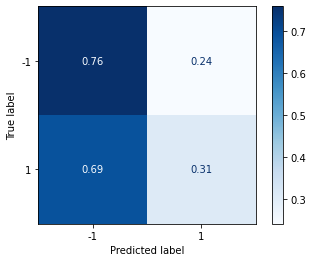

In [114]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
labels = LR_w2v.classes_
predicted_labels = LR_w2v.predict(X_w2v_test)

print('\nClassification Report Simpsons Word2Vec :\n')
print(
    classification_report(y_w2v_test,
                          predicted_labels,
                          labels=labels))
plot_confusion_matrix(LR_w2v, X_w2v_test, y_w2v_test, display_labels=labels,
                                 normalize='true', cmap=plt.cm.Blues)

##### Reporte FastText


Classification Report simpsons FastText :

              precision    recall  f1-score   support

          -1       0.78      0.74      0.76       221
           1       0.56      0.62      0.59       118

    accuracy                           0.70       339
   macro avg       0.67      0.68      0.68       339
weighted avg       0.71      0.70      0.70       339



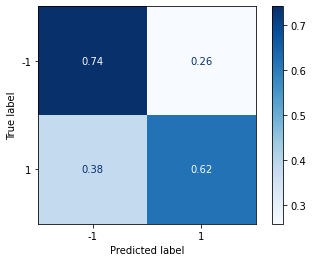

In [119]:
labels = LR_ft.classes_
predicted_labels = LR_ft.predict(X_ft_test)
print('\nClassification Report simpsons FastText :\n')
print(
    classification_report(y_ft_test,
                          predicted_labels,
                          labels=labels))
plot_confusion_matrix(LR_ft, X_ft_test, y_ft_test, display_labels=labels,
                                 normalize='true', cmap=plt.cm.Blues)

Como se puede ver en los resultados anteriores, el modelo entrenado con embeddings del modelo de tipo FastText presenta mejores resultados en accuracy, precision, recall y f1-score, solo bajando levemente el racall para la clase 1. Estos resultados se pueden deber a que el modelo w2v no puede procesar palabras fuera del vocabulario, dejando fuera mas de dos tercios del dataset (2458), teniendo así menos ejemplos para entrenar.

Estos resultados se podrían mejorar usando modelos de embedding entrenados sobre corpus más grandes

# Bonus: 2 puntos en cualquier pregunta

**Pregunta 1**: Replicar la parte anterior utilizando embeddings pre-entrenados en un dataset más grande y obtener mejores resultados. Les puede servir [ésta](https://radimrehurek.com/gensim/downloader.html#module-gensim.downloader) documentacion de gensim (1 punto).

**Respuesta**:

In [120]:
import gensim.downloader as api
model_glove = api.load("glove-wiki-gigaword-200")  # load glove vectors

2020-06-09 12:30:09,701 : INFO : Creating /home/javier/gensim-data


[==================================================] 100.0% 252.1/252.1MB downloaded


2020-06-09 12:31:16,103 : INFO : glove-wiki-gigaword-200 downloaded
2020-06-09 12:31:16,107 : INFO : loading projection weights from /home/javier/gensim-data/glove-wiki-gigaword-200/glove-wiki-gigaword-200.gz
2020-06-09 12:32:13,842 : INFO : loaded (400000, 200) matrix from /home/javier/gensim-data/glove-wiki-gigaword-200/glove-wiki-gigaword-200.gz


In [122]:
list_glove = [row_to_embedding(model_glove, word, pol) for word, pol in zip(df_afinn[0], df_afinn[1])]

In [123]:
df_glove = pd.DataFrame(list_glove, columns=['word', 'embedding', 'polarity'])

In [125]:
df_glove.isna().sum()

word           0
embedding    157
polarity       0
dtype: int64

In [126]:
df_glove = df_glove.dropna()

In [128]:
df_glove

,word,embedding,polarity
0,tops,"[0.11806, -0.66712, -0.33831, 0.36472, 0.58755...",1
1,groan,"[0.69201, -0.16756, 0.2308, 0.17145, 0.0035188...",-1
2,perfects,"[0.54694, -0.66065, 0.02605, 0.4822, 0.21616, ...",1
3,spammer,"[0.2717, -0.038178, 0.43993, -0.1564, 0.42552,...",-1
4,saluting,"[-0.062956, 0.33258, 0.081622, 0.59953, -0.513...",1
...,...,...,...
3377,mediocrity,"[-0.21566, 0.023621, -0.072917, 0.82215, -0.10...",-1
3378,bold,"[0.10807, 0.55807, -0.44751, -0.24898, 0.61079...",1
3379,hating,"[-0.15068, 0.24947, -0.034639, 0.77985, -0.507...",-1
3380,unfavorable,"[0.28808, 0.44418, 0.14177, 0.34296, -0.002689...",-1


In [129]:
X_glove = np.array(list(df_glove.embedding))

y_glove = df_glove.polarity.values

In [130]:
X_glove_train, X_glove_test, y_glove_train, y_glove_test = train_test_split(X_glove, y_glove, random_state=0, test_size=0.1, stratify=y_glove)

In [131]:
LR_glove = linear_model.LogisticRegression(class_weight='balanced')

In [132]:
LR_glove.fit(X_glove_train,y_glove_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Classification Report glove-wiki-gigaword-200:

              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       211
           1       0.86      0.88      0.87       112

    accuracy                           0.91       323
   macro avg       0.90      0.90      0.90       323
weighted avg       0.91      0.91      0.91       323



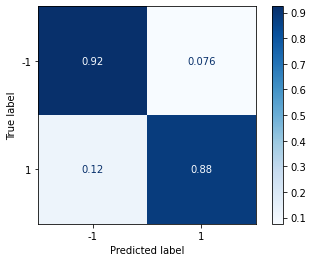

In [134]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
labels = LR_glove.classes_
predicted_labels = LR_glove.predict(X_glove_test)

print('\nClassification Report glove-wiki-gigaword-200:\n')
print(
    classification_report(y_glove_test,
                          predicted_labels,
                          labels=labels))
plot_confusion_matrix(LR_glove, X_glove_test, y_glove_test, display_labels=labels,
                                 normalize='true', cmap=plt.cm.Blues)

**Pregunta 2**: Utilizar wefe para ver si el modelo w2v entrenado con los dialogos de los Simpson tienen algun bias entre los personajes hombres y la cerveza (1 punto):

**Respuesta**: